# Experiments of DBSCAN Algorithm for Data Clustering

* Importing Necessary Libraries

In [15]:
import dbscan_lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from dbscan_lib.dbscan import DBSCAN
from dbscan_lib.heatmap import plot_heatmap
from dbscan_lib.plot_clusters import plot_clusters
from dbscan_lib.k_distance_plot import k_distance_plot

## Experiment 1: DBSCAN on Iris Dataset vs Scikit-Learn DBSCAN

In [16]:
# Load Iris dataset for experiment
iris = pd.read_csv('datasets/iris_dataset.csv')
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


* Get X and y from Iris Dataset

In [17]:
# Get X and y from dataset
X = iris.drop(['target','target_name'], axis=1,inplace=False)
y = iris['target']

* Normalize the X data to make it suitable for DBSCAN

In [18]:
# Normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

* Since we have 4 features, we will use 8 as minPts and for 8 nearest neighbors, we will find the eps value using the elbow method

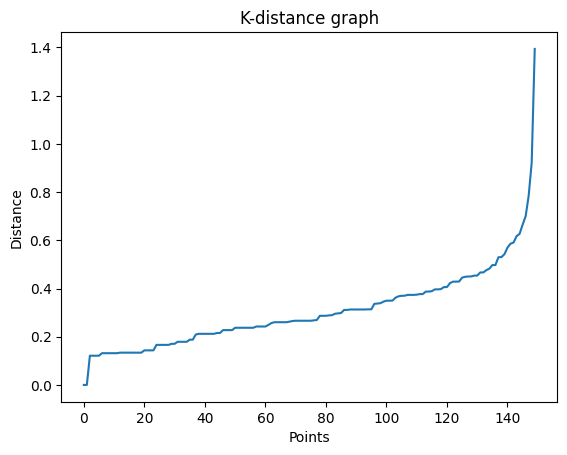

In [19]:
from dbscan_lib.k_distance_plot import k_distance_plot
k_distance_plot(X, 8)

* Cluster the data using DBSCAN and plot the clusters, heatmap and get silhouette score, davies bouldin score

Silhouette score: 0.5108084808380122
Davies-Bouldin score: 3.1970977798153855


<Figure size 640x480 with 0 Axes>

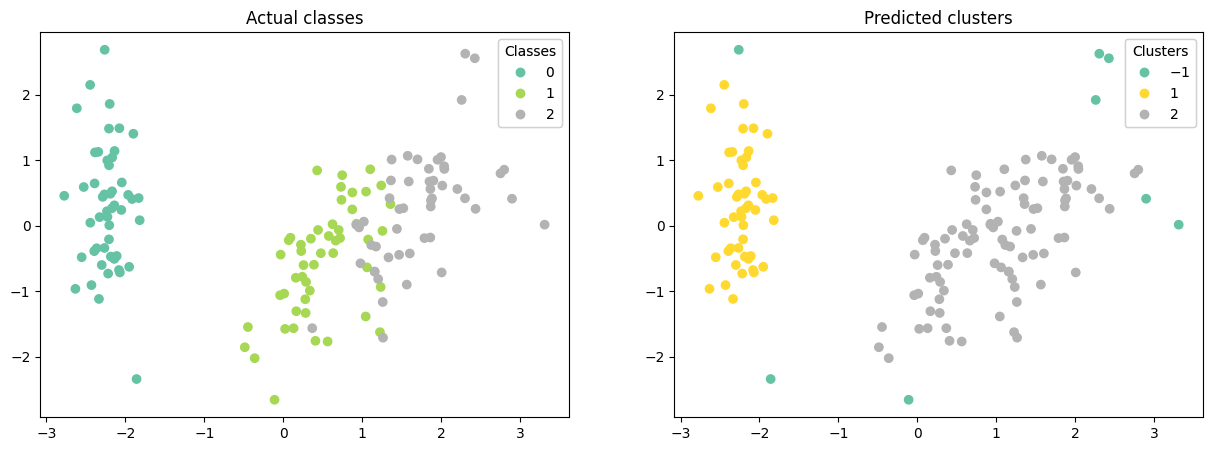

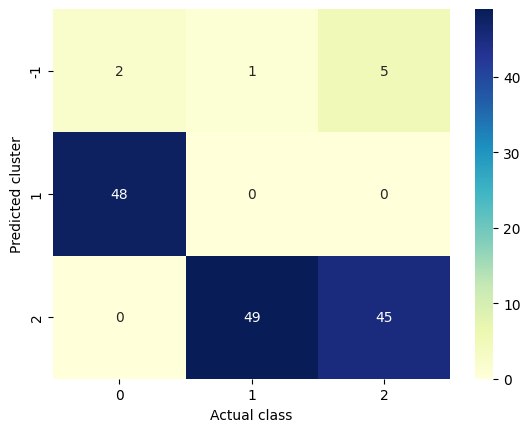

In [21]:
# Cluster Iris dataset using DBSCAN algorithm
dbscan = DBSCAN(eps=0.8, min_pts=8)
clusters = dbscan.fit(X)

# Silhouette score
print(f"Silhouette score: {silhouette_score(X, clusters)}")

# Davies-Bouldin score
print(f"Davies-Bouldin score: {davies_bouldin_score(X, clusters)}")

# Plot clusters
plt.figure(1)
plot_clusters(X, y, clusters)
plt.show()

# Plot heatmap
plt.figure(2)
plot_heatmap(y, clusters)
plt.show()

Silhouette score: 0.5108084808380122
Davies-Bouldin score: 3.1970977798153855


<Figure size 640x480 with 0 Axes>

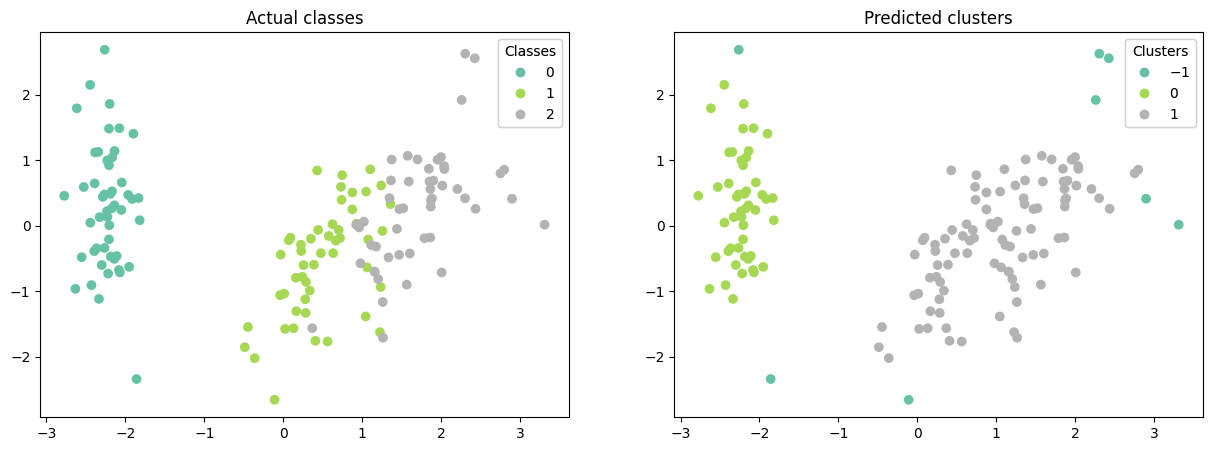

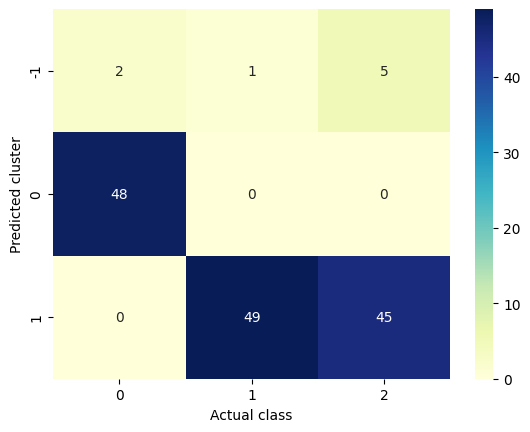

In [22]:
# Cluster Iris dataset using sklearn.cluster.DBSCAN
from sklearn.cluster import DBSCAN as sklearn_DBSCAN
sklearn_dbscan = sklearn_DBSCAN(eps=0.8, min_samples=8)
sklearn_clusters = sklearn_dbscan.fit_predict(X)
sklearn_clusters

# Silhouette score
print(f"Silhouette score: {silhouette_score(X, sklearn_clusters)}")

# Davies-Bouldin score
print(f"Davies-Bouldin score: {davies_bouldin_score(X, sklearn_clusters)}")

# Plot clusters
plt.figure(1)
plot_clusters(X, y, sklearn_clusters)
plt.show()

# Plot heatmap
plt.figure(2)
plot_heatmap(y, sklearn_clusters)
plt.show()

* As we can see from the scores and plots, our implementation of DBSCAN is identical to the scikit-learn DBSCAN.

# Experiment 2: DBSCAN on Iris Dataset vs K-Means

## Clustering Iris Dataset using K-Means

c:\Users\FURKANSALMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score: 0.45994823920518646
Davies-Bouldin score: 0.8335949464754334


<Figure size 640x480 with 0 Axes>

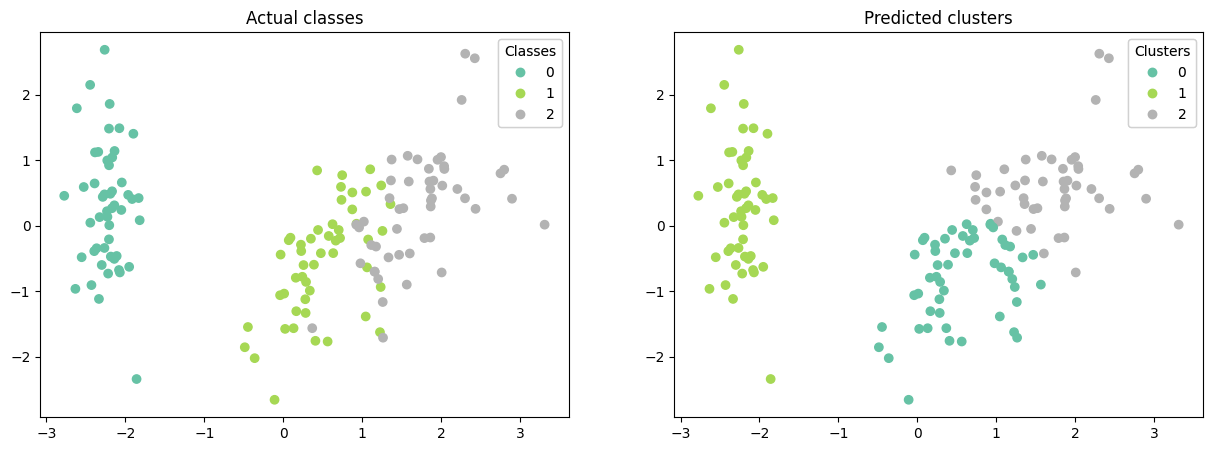

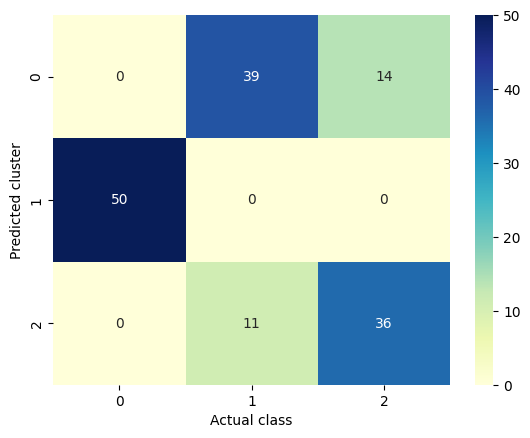

In [23]:
# Cluster Iris dataset using sklearn.cluster.KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_clusters = kmeans.fit_predict(X)

# Silhouette score
print(f"Silhouette score: {silhouette_score(X, kmeans_clusters)}")

# Davies-Bouldin score
print(f"Davies-Bouldin score: {davies_bouldin_score(X, kmeans_clusters)}")

# Plot clusters
plt.figure(1)
plot_clusters(X, y, kmeans_clusters)
plt.show()

# Plot heatmap
plt.figure(2)
plot_heatmap(y, kmeans_clusters)
plt.show()

## Experiment 3: DBSCAN on Wine Dataset vs K-Means

* Import the dataset:

In [24]:
# import wine dataset
wine = pd.read_csv('datasets/wine_dataset.csv')
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,target_name
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [25]:
# Get X and y from dataset
X = wine.drop(['target','target_name'], axis=1,inplace=False)
y = wine['target']

In [27]:
# Normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

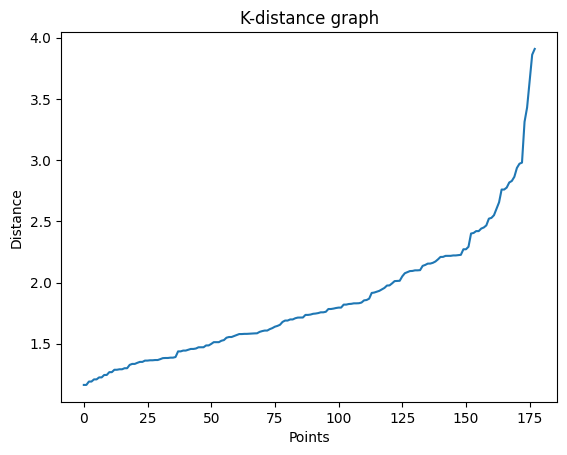

In [31]:
# K-distance plot
k_distance_plot(X, 5)

Silhouette score: 0.13500379635350565
Davies-Bouldin score: 4.750581583735885


<Figure size 640x480 with 0 Axes>

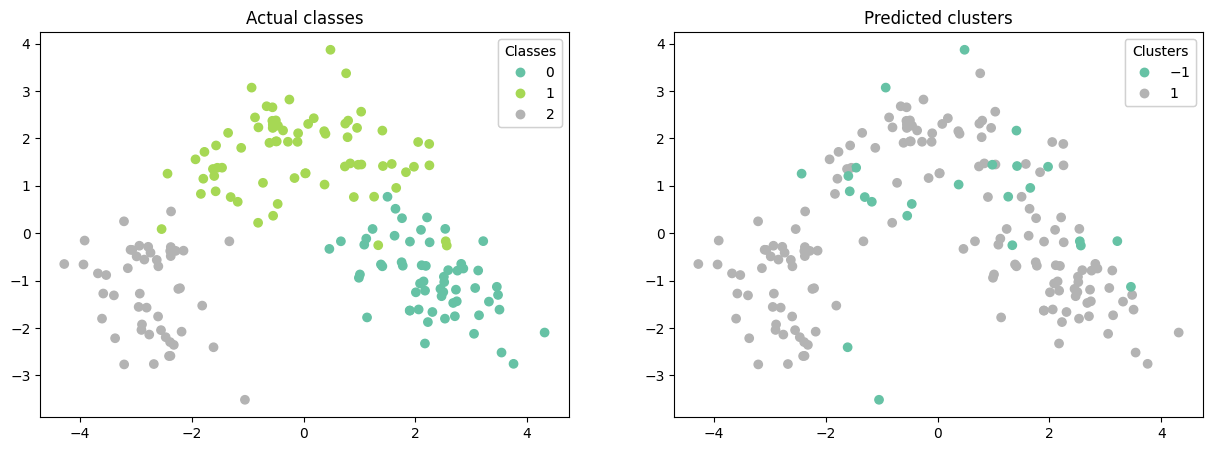

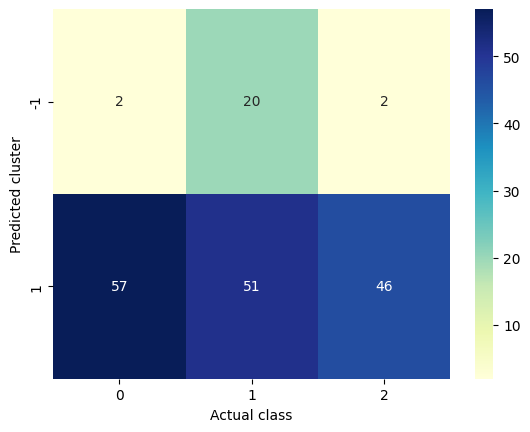

In [37]:
# Cluster wine dataset using DBSCAN algorithm
dbscan = DBSCAN(eps=2.5, min_pts=5)
clusters = dbscan.fit(X)

# Silhouette score
print(f"Silhouette score: {silhouette_score(X, clusters)}")

# Davies-Bouldin score
print(f"Davies-Bouldin score: {davies_bouldin_score(X, clusters)}")

# Plot clusters
plt.figure(1)
plot_clusters(X, y, clusters)
plt.show()

# Plot heatmap
plt.figure(2)
plot_heatmap(y, clusters)
plt.show()


Silhouette score: 0.28594199657074876
Davies-Bouldin score: 1.391793832317738


c:\Users\FURKANSALMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 640x480 with 0 Axes>

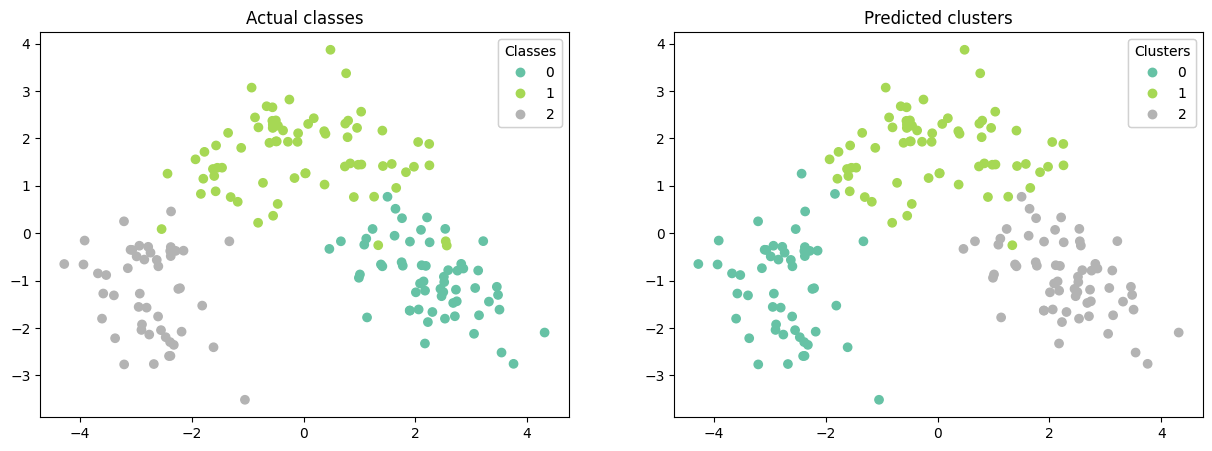

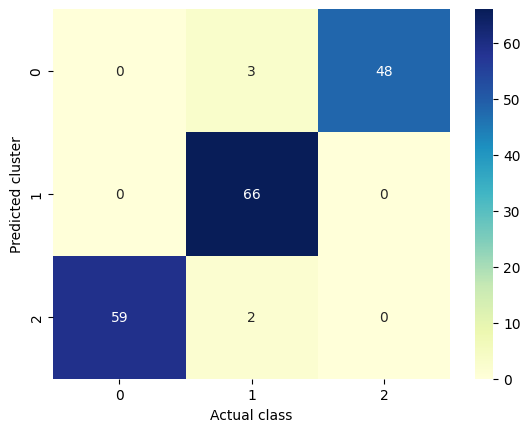

In [38]:
# Cluster wine dataset using sklearn.cluster.KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_clusters = kmeans.fit_predict(X)

# Silhouette score
print(f"Silhouette score: {silhouette_score(X, kmeans_clusters)}")

# Davies-Bouldin score
print(f"Davies-Bouldin score: {davies_bouldin_score(X, kmeans_clusters)}")

# Plot clusters
plt.figure(1)
plot_clusters(X, y, kmeans_clusters)
plt.show()

# Plot heatmap
plt.figure(2)
plot_heatmap(y, kmeans_clusters)
plt.show()

## DBSCAN on Glass Dataset vs K-Means

* Import the dataset:

In [41]:
# Get the glass dataset
glass = pd.read_csv('datasets/glass_dataset.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,target_name,target
0,1.51567,13.29,3.45,1.21,72.74,0.56,8.57,0.00,0.00,build_wind_float,0
1,1.52667,13.99,3.70,0.71,71.57,0.02,9.82,0.00,0.10,build_wind_float,0
2,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,containers,2
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,build_wind_float,0
4,1.52068,13.55,2.09,1.67,72.18,0.53,9.57,0.27,0.17,build_wind_non-float,1


In [42]:
# get X and y from dataset
X = glass.drop(['target','target_name'], axis=1,inplace=False)
y = glass['target']

In [43]:
# Normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

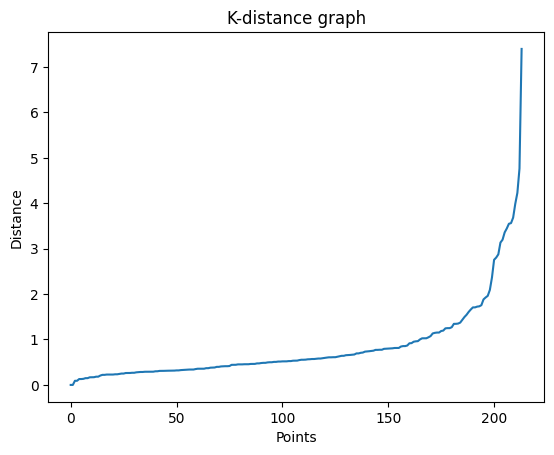

In [44]:
# K-distance plot
k_distance_plot(X, 5)

Silhouette score: 0.38247561828357857
Davies-Bouldin score: 1.9371871731151702


<Figure size 640x480 with 0 Axes>

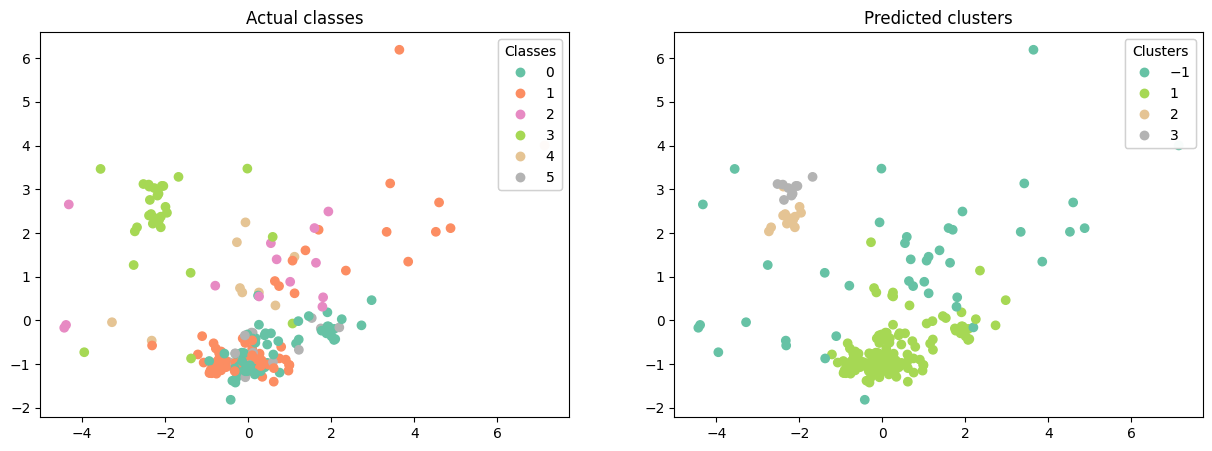

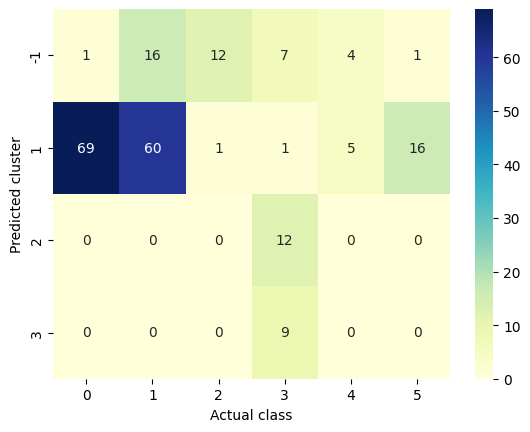

In [45]:
# Cluster glass dataset using DBSCAN algorithm
dbscan = DBSCAN(eps=1.5, min_pts=5)
clusters = dbscan.fit(X)

# Silhouette score
print(f"Silhouette score: {silhouette_score(X, clusters)}")

# Davies-Bouldin score
print(f"Davies-Bouldin score: {davies_bouldin_score(X, clusters)}")

# Plot clusters
plt.figure(1)
plot_clusters(X, y, clusters)
plt.show()

# Plot heatmap
plt.figure(2)
plot_heatmap(y, clusters)
plt.show()

Silhouette score: 0.32626349113904424
Davies-Bouldin score: 0.95365965910836


c:\Users\FURKANSALMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 640x480 with 0 Axes>

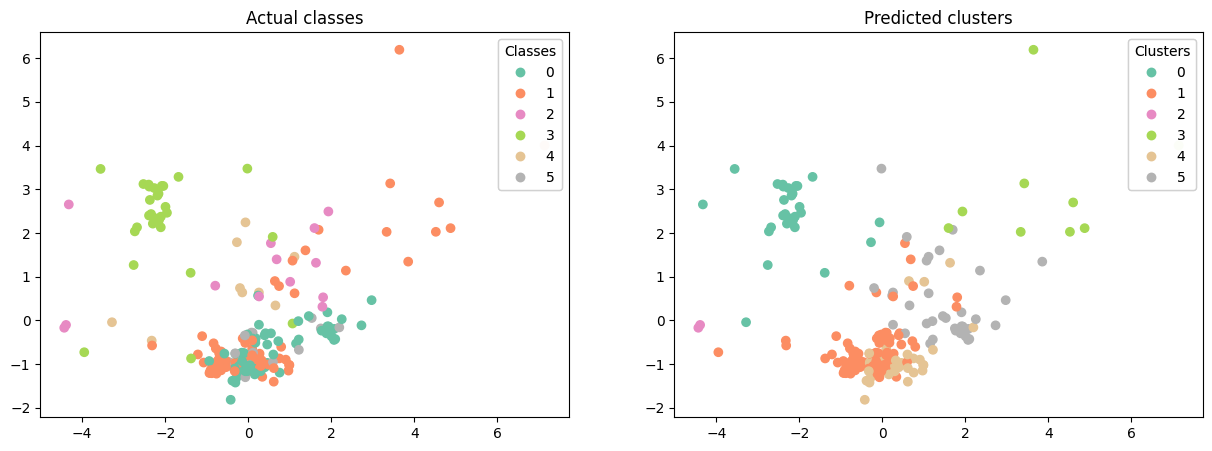

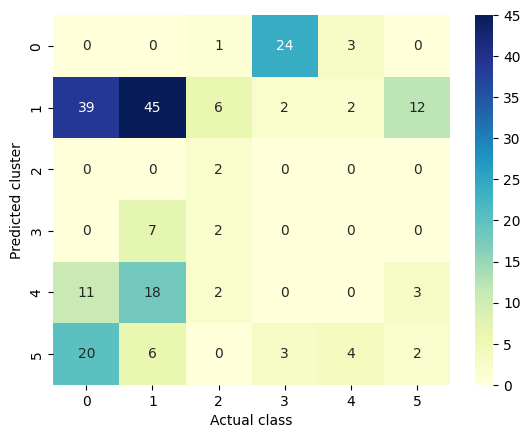

In [46]:
# Cluster glass dataset using sklearn.cluster.KMeans
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans_clusters = kmeans.fit_predict(X)

# Silhouette score
print(f"Silhouette score: {silhouette_score(X, kmeans_clusters)}")

# Davies-Bouldin score
print(f"Davies-Bouldin score: {davies_bouldin_score(X, kmeans_clusters)}")

# Plot clusters
plt.figure(1)
plot_clusters(X, y, kmeans_clusters)
plt.show()

# Plot heatmap
plt.figure(2)
plot_heatmap(y, kmeans_clusters)
plt.show()